In [1]:
import plots 
plots.mpltoolkit.load_mpl_presets()
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patheffects as pe 
from matplotlib.ticker import FormatStrFormatter as fsf 
import numpy as np 
import vice 
from vice.yields.presets import JW20 
import sys 
sys.path.append("../") 
import src 
from src.plots.plots.utils import dummy_background_axes 
from src.simulations.yields import linear_agb_yield 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0rc1-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:147: UserWarning: Using a pre-release of VICE
  UserWarning)


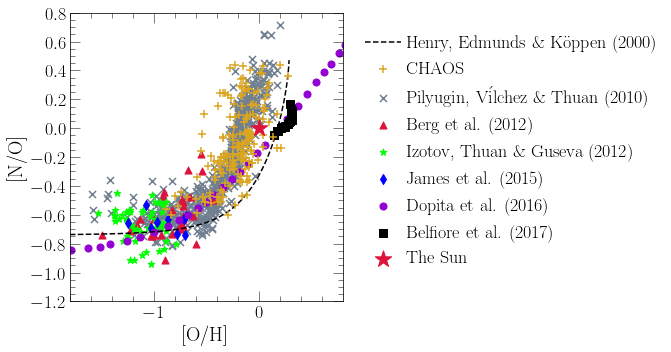

In [17]:
### figure setup ### 
fig = plt.figure(figsize = (9.5, 5)) 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.8, 0.8]) 
ax.set_ylim([-1.2, 0.8])
ax.set_yticks([-1.2 + 0.2 * _ for _ in range(11)])

### CHAOS galaxies ###
chaos = src.data.read("chaos")
kwargs = {
    "c": plots.mpltoolkit.named_colors()["goldenrod"],
    "marker": plots.mpltoolkit.markers()["plus"],
    "label": "CHAOS",
    "s": 50
}
ax.scatter(chaos["[o/h]"], chaos["[n/o]"], zorder = 10, **kwargs)

### Pilyugin, Vilchez & Thuan (2010) ### 
pilyugin2010 = src.data.read("pilyugin2010")
kwargs["c"] = plots.mpltoolkit.named_colors()["slategray"]
kwargs["marker"] = "x"
kwargs["label"] = r"Pilyugin, V$\acute{\text{i}}$lchez \& Thuan (2010)"
ax.scatter(pilyugin2010["[o/h]"], pilyugin2010["[n/o]"], **kwargs) 

### Berg et al. (2012) ### 
berg2012 = src.data.read("berg2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["crimson"] 
kwargs["marker"] = plots.mpltoolkit.markers()["triangle_up"] 
kwargs["label"] = "Berg et al. (2012)" 
ax.scatter(berg2012["[o/h]"], berg2012["[n/o]"], **kwargs) 

### Izotov, Thuan & Guseva (2012) ### 
izotov2012 = src.data.read("izotov2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["lime"] 
kwargs["marker"] = plots.mpltoolkit.markers()["star"] 
kwargs["label"] = "Izotov, Thuan \& Guseva (2012)" 
ax.scatter(izotov2012["[o/h]"], izotov2012["[n/o]"], **kwargs) 

### James et al. (2015) ### 
james2015 = src.data.read("james2015") 
kwargs["c"] = plots.mpltoolkit.named_colors()["blue"] 
kwargs["marker"] = plots.mpltoolkit.markers()["thin_diamond"] 
kwargs["label"] = "James et al. (2015)" 
ax.scatter(james2015["[o/h]"], james2015["[n/o]"], **kwargs) 

### Dopita et al. (2016) ### 
dopita2016 = src.data.read("dopita2016") 
kwargs["c"] = plots.mpltoolkit.named_colors()["darkviolet"] 
kwargs["marker"] = plots.mpltoolkit.markers()["circle"] 
kwargs["label"] = "Dopita et al. (2016)" 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 

### Belfiore et al. (2017) ### 
belfiore2017 = src.data.read("belfiore2017") 
kwargs["c"] = plots.mpltoolkit.named_colors()["black"] 
kwargs["marker"] = plots.mpltoolkit.markers()["square"] 
kwargs["label"] = "Belfiore et al. (2017)" 
ax.scatter(belfiore2017["[o/h]"], belfiore2017["[n/o]"], **kwargs) 

### Henry, Edmunds & Koeppen (2000) 
henry2000 = src.no_oh_relation.Henry2000() 
xvals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000) 
yvals = [henry2000(_) for _ in xvals] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = '--', label = r"Henry, Edmunds \& K$\ddot{\text{o}}$ppen (2000)") 

### the sun ### 
ax.scatter([0], [0], c = plots.mpltoolkit.named_colors()["crimson"], 
    marker = plots.mpltoolkit.markers()["star"], s = 300, zorder = 100, 
    label = "The Sun")

### Legend ### 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
#     "frameon": False, 
#     "fontsize": 20, 
    "bbox_to_anchor": (1.02, 0.98) 
} 
ax.legend(**kwargs) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_observed.pdf") 
plt.show() 

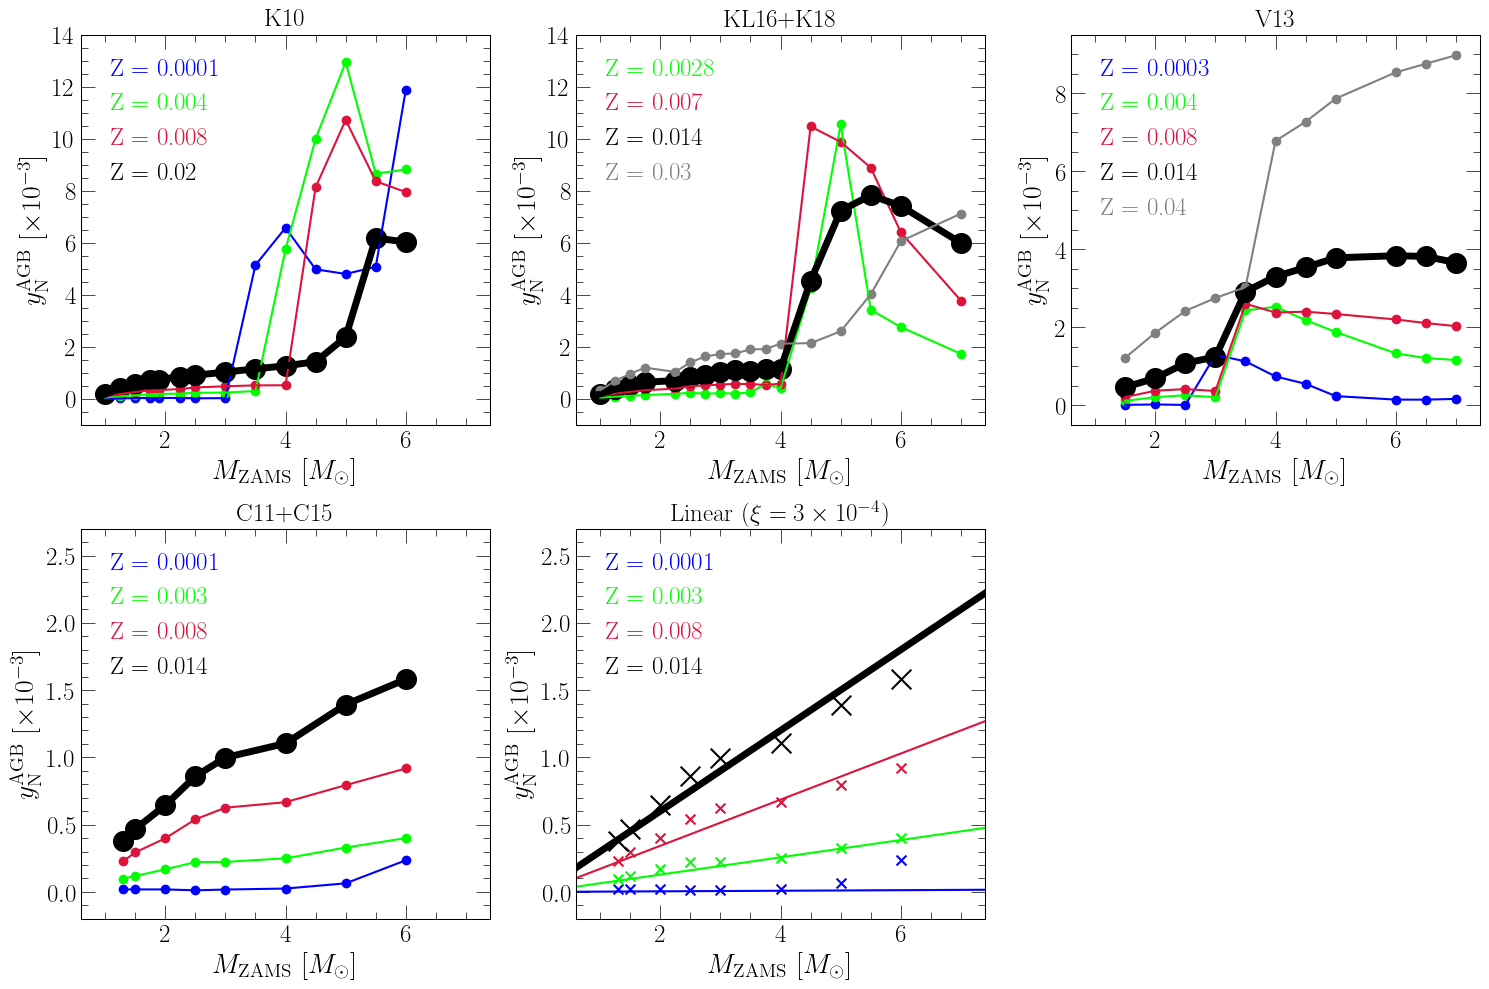

In [10]:
logprefactor = 3 # overall factor of 10^(-logprefactor) 
skip = 5 # no panel in the sixth position (5 + 1) 

### figure setup ### 
fig = plt.figure(figsize = (15, 10), facecolor = "white") 
axes = [] 
ylim = [[-1, 14], [-1, 14], [-0.5, 9.5], [-0.2, 2.7], [-0.2, 2.7], None] 
labels = ["K10", "KL16+K18", "V13", "C11+C15", r"Linear ($\xi = 3\times10^{-4}$)", None] 
for i in range(6): 
    if i == skip: continue 
    axes.append(fig.add_subplot(231 + i)) 
    axes[i - int(i > skip)].set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
    axes[i - int(i > skip)].set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]") 
    axes[i - int(i > skip)].set_xlim([0.6, 7.4]) 
    axes[i - int(i > skip)].set_ylim(ylim[i]) 
    axes[i - int(i > skip)].set_title(labels[i])
    if i < 2: axes[i - int(i > skip)].set_yticks(range(0, 16, 2))

### colors to plot each study's table in - each of the same length as the metallicities ### 
# colors = {
#     "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
#                     "green", "gold", "orange", "darkorange", "red", "maroon"], 
#     "karakas10": ["black", "blue", "lime", "crimson"], 
#     "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"], 
#     "karakas16": ["darkviolet", "deepskyblue", "red", "grey"] 
# } 
colors = {
    "cristallo11": ["blue", "lime", "crimson", "black"], 
    "karakas10": ["blue", "lime", "crimson", "black"], 
    "ventura13": ["blue", "lime", "crimson", "black", "grey"], 
    "karakas16": ["lime", "crimson", "black", "grey"]  
}
zvals = {
    "cristallo11": [0.0001, 0.003, 0.008, 0.014], 
    "karakas10": [0.0001, 0.004, 0.008, 0.02], 
    "ventura13": [0.0003, 0.004, 0.008, 0.014, 0.04], 
    "karakas16": [0.0028, 0.007, 0.014, 0.03] 
}
studies = ["karakas10", "karakas16", "ventura13", "cristallo11", None] 
for i in range(5): ### for each published table 
    legend_kwargs = {
        "loc": plots.mpltoolkit.mpl_loc("upper left"), 
#         "frameon": False, 
        "handlelength": 0, 
#         "fontsize": 18 
    }
    if i == skip - 1: continue 
    y, m, z = vice.yields.agb.grid('n', study = studies[i]) 
    n = 0
    for j in range(len(z)): ### for each metallicity they report yields at 
        if z[j] not in zvals[studies[i]]: continue 
        # plot points connected by lines 
        yields = [10**logprefactor * _[j] for _ in y] 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[studies[i]][n]]} 
        n += 1 
        if z[j] == 0.014 or z[j] == 0.02: kwargs['s'] = 200 
        else: pass 
        axes[i - int(i > skip)].scatter(m, yields, **kwargs) 
        if "s" in kwargs.keys(): del kwargs["s"] 
        kwargs["label"] = "Z = %g" % (z[j]) 
        if z[j] == 0.014 or z[j] == 0.02: kwargs["linewidth"] = 5 
        axes[i - int(i > skip)].plot(m, yields, **kwargs) 
        if "linewidth" in kwargs.keys(): del kwargs["linewidth"] 
#         if i == 3: 
#             legend_kwargs["ncol"] = 2 
#             legend_kwargs["columnspacing"] = 1.0 
#         else: 
#             legend_kwargs["ncol"] = 1 
    leg = axes[i - int(i > skip)].legend(**legend_kwargs) 
    for j in range(n): 
        leg.get_texts()[j].set_color(colors[studies[i]][j]) 
        leg.legendHandles[j].set_visible(False) 
        
### The linear model, with a few reference points from Cristallo et al. (2011, 2015) 
Z = [0.0001, 0.003, 0.008, 0.014] 
colors = ["blue", "lime", "crimson", "black"] 
model = linear_agb_yield(slope = 3.0e-4) 
y, m, z = vice.yields.agb.grid('n', study = "cristallo11") 
for i in range(len(Z)): 
    masses = np.linspace(axes[-1].get_xlim()[0], axes[-1].get_xlim()[1], 1000) 
    yields = [10**logprefactor * model(mass, Z[i]) for mass in masses] 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    idx = z.index(Z[i]) 
    yields_ = [10**logprefactor * _[idx] for _ in y] 
    if Z[i] == 0.014: 
        kwargs["s"] = 200 
    else: 
        kwargs["s"] = 50 
    axes[-1].scatter(m, yields_, marker = plots.mpltoolkit.markers()["x"], **kwargs) 
    if "s" in kwargs.keys(): del kwargs["s"] 
    kwargs["label"] = "Z = %g" % (Z[i]) 
    if Z[i] == 0.014: kwargs["linewidth"] = 5 
    axes[-1].plot(masses, yields, **kwargs) 
legend_kwargs["ncol"] = 1
leg = axes[-1].legend(**legend_kwargs) 
for i in range(len(Z)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 


plt.tight_layout() 
# plt.subplots_adjust(hspace = 0) 
plt.savefig("../paper/agb_yield_models.pdf") 
plt.show() 

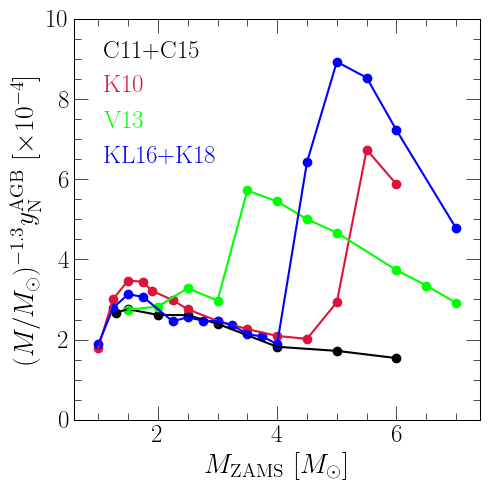

In [14]:
logprefactor = 4 

# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
# ax.set_ylabel(r"$(M/M_\odot)^{-2.3}y_\text{N}^\text{AGB}$ [$\times10^{-%d}$]" % (
#     logprefactor)) 
ax.set_ylabel(r"$(M/M_\odot)^{-1.3}y_\text{N}^\text{AGB}$ [$\times10^{-%d}$]" % (
    logprefactor)) 
ax.set_xlim([0.6, 7.4]) 
# ax.set_ylim([0.0, 2.5]) 
ax.set_ylim([0.0, 10.0]) 

colors = {
    "cristallo11": "black", 
    "karakas10": "crimson",
    "ventura13": "lime",
    "karakas16": "blue", 
    "linear": "darkviolet" 
} 
zvals = {
    "cristallo11": 0.014, 
    "ventura13": 0.014, 
    "karakas10": 0.02, 
    "karakas16": 0.014, 
    "linear": 0.014
} 
labels = {
    "cristallo11": "C11+C15", 
    "ventura13": "V13", 
    "karakas10": "K10", 
    "karakas16": "KL16+K18", 
    "linear": "Linear" 
}

for study in colors.keys(): 
    if study == "linear": continue 
    y, m, z = vice.yields.agb.grid('n', study = study) 
    idx = z.index(zvals[study]) 
    yields = len(m) * [0.] 
#     for i in range(len(yields)): yields[i] = 10**logprefactor * y[i][idx] * m[i]**-2.3 
    for i in range(len(yields)): yields[i] = 10**logprefactor * y[i][idx] * m[i]**-1.3 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[study]]} 
    ax.scatter(m, yields, **kwargs) 
    kwargs["label"] = labels[study] 
    ax.plot(m, yields, **kwargs) 
    
# linear = linear_agb_yield(slope = 3.0e-4) 
# xvals = np.linspace(1, 7, 1000) 
# yvals = [10**logprefactor * _**-1.3 * linear(_, 0.014) for _ in xvals] 
# kwargs["c"] = colors["linear"]  
# kwargs["label"] = labels["linear"] 
# ax.plot(xvals, yvals, **kwargs) 
    
# leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 2, frameon = False, 
#     handlelength = 0) 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, handlelength = 0) 
for i in range(len(leg.legendHandles)): 
    leg.get_texts()[i].set_color(colors[list(colors.keys())[i]]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 
plt.savefig("../paper/agb_yield_models_imfweighted.pdf") 
plt.show() 

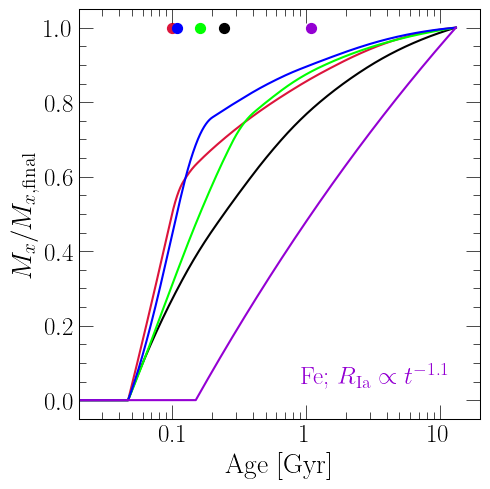

In [15]:
vice.mlr.setting = "larson1974" # the mass-lifetime relation to adopt 
cc_yield = vice.yields.ccsne.settings['n'] 
vice.yields.ccsne.settings['n'] = 0 

# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.set_xlabel("Age [Gyr]") 
ax.set_ylabel(r"$M_x/M_{x,\text{final}}$") 
ax.set_xscale("log") 
ax.xaxis.set_major_formatter(fsf("%g")) 
ax.set_xlim([0.02, 20]) 
ax.set_ylim([-0.05, 1.05]) 

colors = {
    "cristallo11": "black", 
    "karakas10": "crimson", 
    "ventura13": "lime", 
    "karakas16": "blue", 
    "linear": "darkviolet" 
} 
zvals = {
    "cristallo11": 0.014, 
    "ventura13": 0.014, 
    "karakas10": 0.02, 
    "karakas16": 0.014, 
    "linear": 0.014 
} 
labels = {
    "cristallo11": "C11+C15", 
    "ventura13": "V13", 
    "karakas10": "K10", 
    "karakas16": "KL16+K18", 
    "linear": "Linear" 
}

ssp_kwargs = {
    "time": 13.2, 
    "dt": 1.e-4 
}

current = vice.yields.agb.settings['n'] 
for study in colors.keys(): 
    if study == "linear": 
#         vice.yields.agb.settings['n'] = linear_agb_yield(slope = 3.0e-4) 
        continue 
    else: 
        vice.yields.agb.settings['n'] = study 
    ssp_kwargs["Z"] = zvals[study] 
    mass, times = vice.single_stellar_population('n', **ssp_kwargs) 
    mass = [_ / mass[-1] for _ in mass] 
    idx = 0 
    while mass[idx] < 0.5: idx += 1 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[study]]} 
    ax.scatter(times[idx], 1.0, s = 50, **kwargs) 
#     kwargs["label"] = labels[study] 
    if study == "linear": kwargs["label"] = labels[study] 
    ax.plot(times, mass, **kwargs) 
vice.yields.agb.settings['n'] = current 

fe_cc_yield = vice.yields.ccsne.settings['fe'] 
vice.yields.ccsne.settings['fe'] = 0 
mass, times = vice.single_stellar_population('fe', **ssp_kwargs) 
mass = [_ / mass[-1] for _ in mass] 
idx = 0 
while mass[idx] < 0.5: idx += 1 
kwargs = {"c": plots.mpltoolkit.named_colors()["darkviolet"]} 
ax.scatter(times[idx], 1.0, s = 50, **kwargs) 
kwargs["label"] = r"Fe; $R_\text{Ia} \propto t^{-1.1}$" 
ax.plot(times, mass, **kwargs) 

leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    handlelength = 0, bbox_to_anchor = (0.98, 0.02)) 
# fig.canvas.draw() 
# shift = max([text.get_window_extent().width for text in leg.get_texts()]) 
# for i in range(len(leg.legendHandles)): 
#     leg.get_texts()[i].set_color(colors[list(colors.keys())[i]]) 
#     leg.get_texts()[i].set_ha("right") 
#     leg.get_texts()[i].set_position([shift, 0]) 
#     leg.legendHandles[i].set_visible(False) 
leg.get_texts()[0].set_color(colors["linear"]) 
leg.legendHandles[0].set_visible(False) 

vice.yields.ccsne.settings['n'] = cc_yield 
vice.yields.ccsne.settings['fe'] = fe_cc_yield 
plt.tight_layout() 
plt.savefig("../paper/ssp_production_modelcomp.pdf") 
plt.show() 

cristallo11
0
828
karakas10
0
828
ventura13
128
944
karakas16
500
896
linear


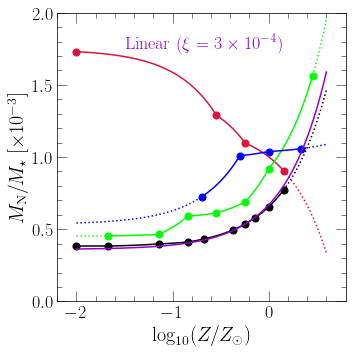

In [7]:
logprefactor = 3 
current_agb_model = vice.yields.agb.settings["n"] 
current_mlr = vice.mlr.setting 
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlabel(r"$\log_{10}(Z/Z_\odot)$") 
ax.set_ylabel(r"$M_\text{N} / M_\star$ [$\times10^{-%d}$]" % (logprefactor)) 
# zvals = [0.014 * 10**_ for _ in np.linspace(-2, 1, 1000)] 
logzvals = np.linspace(-2, 0.6, 1000) 
ax.set_ylim([0.0, 2.0]) 
ax.set_xlim([-2.2, 0.8]) 
ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0]) 

colors = {
    "cristallo11": "black", 
    "karakas10": "crimson", 
    "ventura13": "lime", 
    "karakas16": "blue", 
    "linear": "darkviolet" 
} 

labels = {
    "cristallo11": "C11+C15", 
    "ventura13": "V13", 
    "karakas10": "K10", 
    "karakas16": "KL16+K18", 
    "linear": r"Linear ($\xi = 3\times10^{-4}$)" 
}

# vice.mlr.setting = "ka1997" 
# vice.mlr.setting = "powerlaw" 
vice.mlr.setting = "larson1974" 
for study in colors.keys(): 
    print(study) 
    mstar = 1e6 
    kwargs = {
        "time": 13.2, 
        "dt": 1e-2, 
        "mstar": mstar 
    } 
    mass_yields = len(logzvals) * [0.] 
    if study == "linear": 
        vice.yields.agb.settings['n'] = linear_agb_yield(slope = 3.e-4) 
    else: 
        vice.yields.agb.settings['n'] = study 
    for i in range(len(logzvals)): 
        mass, times = vice.single_stellar_population("n", Z = 0.014 * 10**logzvals[i], **kwargs) 
        mass_yields[i] = mass[-1] / mstar * 10**logprefactor 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[study]] 
    } 
#     if study == "linear": kwargs["label"] = labels[study]
#     ax.plot(logzvals, mass_yields, **kwargs)
    if study != "linear": 
        y, m, z = vice.yields.agb.grid('n', study = study) 
        idx_lower = idx_upper = -1
        for i in range(len(logzvals)):
            if idx_lower == -1 and 0.014 * 10**logzvals[i] > z[0]: idx_lower = i
            if idx_upper == -1 and 0.014 * 10**logzvals[i] > z[-1]: idx_upper = i
        print(idx_lower)
        print(idx_upper)
        if idx_lower == -1: idx_lower = 0
        if idx_upper == -1: idx_upper = len(logzvals) - 1
        ax.plot(logzvals[:idx_lower], mass_yields[:idx_lower], linestyle = ':', **kwargs)
        ax.plot(logzvals[idx_lower:idx_upper], mass_yields[idx_lower:idx_upper], **kwargs)
        ax.plot(logzvals[idx_upper:], mass_yields[idx_upper:], linestyle = ':', **kwargs)
        for i in range(len(z)): 
            logz = np.log10(z[i] / 0.014) 
            diff = [abs(_ - logz) for _ in logzvals] 
            idx = diff.index(min(diff)) 
            if "label" in kwargs.keys(): del kwargs["label"] 
            kwargs["s"] = 50 
            ax.scatter(logzvals[idx], mass_yields[idx], **kwargs) 
    else:
        kwargs["label"] = labels[study]
        ax.plot(logzvals, mass_yields, linestyle = '-', **kwargs)
    
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper center"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.50, 0.98), 
    "handlelength": 0 
} 
leg = ax.legend(**kwargs) 
# for i in range(len(colors.keys())): 
#     leg.get_texts()[i].set_color(colors[list(colors.keys())[i]]) 
#     leg.legendHandles[i].set_visible(False) 
leg.get_texts()[0].set_color(colors["linear"]) 
leg.legendHandles[0].set_visible(False) 
    
vice.mlr.setting = current_mlr 
vice.yields.agb.settings['n'] = current_agb_model 
plt.tight_layout() 
plt.savefig("../paper/ssp_production_metdep.pdf") 
plt.show() 

<ipython-input-22-75352e6bbb20>:69: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
  y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k)
<ipython-input-22-75352e6bbb20>:70: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
  y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k)
<ipython-input-22-75352e6bbb20>:69: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upp

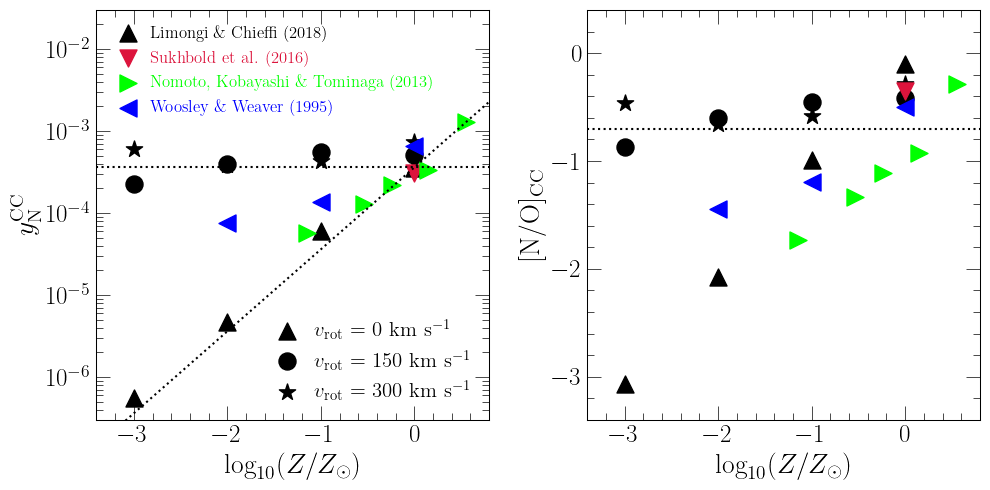

In [22]:
# fig = plt.figure(figsize = (14, 7), facecolor = "white") 
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax2.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax1.set_ylabel(r"$y_\text{N}^\text{CC}$") 
# ax2.set_ylabel(r"$\log_{10}\text{(N/O)}_\text{CC}$") 
ax2.set_ylabel(r"[N/O]$_\text{CC}$") 
ax1.set_yscale("log") 
ax1.set_xlim([-3.4, 0.8]) 
ax2.set_xlim([-3.4, 0.8]) 
ax1.set_ylim([3.e-7, 3.e-2]) 
ax2.set_ylim([-3.4, 0.4]) 
ax2.set_yticks([-3, -2, -1, 0]) 
studies = ["LC18", "S16/W18", "NKT13", "WW95"] 
names = {
    "LC18": "Limongi \& Chieffi (2018)", 
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)", 
    "S16/W18": "Sukhbold et al. (2016)", 
    "WW95": "Woosley \& Weaver (1995)" 
}
metallicities = {
    "LC18": [-3, -2, -1, 0], 
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55], 
    "S16/W18": [0], 
    "WW95": [-4, -2, -1, 0] 
} 
rotation = {
    "LC18": [0, 150, 300], 
    "NKT13": [0], 
    "S16/W18": [0], 
    "WW95": [0] 
}
# markers = {
#     0: "circle", 
#     150: "triangle_up", 
#     300: "star" 
# }
markers = {
    0: {
        "LC18": "triangle_up", 
        "NKT13": "triangle_right", 
        "S16/W18": "triangle_down", 
        "WW95": "triangle_left" 
    }, 
    150: {
        "LC18": "circle" 
    }, 
    300: {
        "LC18": "star" 
    }
}
colors = {
    "LC18": "black", 
    "NKT13": "lime", 
    "S16/W18": "crimson", 
    "WW95": "blue" 
}

for i in studies: 
    for j in metallicities[i]: 
        for k in rotation[i]: 
            kwargs = {
                "c": plots.mpltoolkit.named_colors()[colors[i]], 
                "marker": plots.mpltoolkit.markers()[markers[k][i]], 
                "s": 150 
            }
            y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k) 
            y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k) 
            cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(vice.solar_z['n'] / vice.solar_z['o']) 
            ax1.scatter(j, y_n_cc, **kwargs) 
            ax2.scatter(j, cc_ratio, **kwargs) 
ax2.plot(ax2.get_xlim(), 2 * [-0.7], c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
            
lines = len(studies) * [None] 
points = len(studies) * [None] 
for i in range(len(lines)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[studies[i]]], 
        "label": names[studies[i]], 
        "marker": plots.mpltoolkit.markers()[markers[0][studies[i]]], 
        "s": 150 
    }
#     lines[i] = ax1.plot([0, 0], [1, 1], **kwargs)[0] 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), fontsize = 12, ncol = 1)
ax1.add_artist(leg) 
for i in range(len(lines)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
#     leg.legendHandles[i].set_visible(False) 
#     lines[i].remove() 
    points[i].remove() 
points = len(rotation["LC18"]) * [None] 
for i in range(len(points)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()["black"], 
        "marker": plots.mpltoolkit.markers()[markers[rotation["LC18"][i]]["LC18"]], 
        "label": r"$v_\text{rot}$ = %g km s$^{-1}$" % (rotation["LC18"][i]), 
        "s": 150 
    } 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), fontsize = 15, ncol = 1) 
for i in range(len(points)): 
    points[i].remove() 
    
# def broken(z): 
#     y = 3.6e-4 
#     if z >= 0.007: y += 2.e-4 * ((z - 0.007) / 0.014)
#     return y 
# yvals = [broken(0.014 * 10**_) for _ in xvals] 
# ax1.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 

def notbroken(z): 
    return 3.6e-4 * (z / 0.014) 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "linestyle": ':' 
}
xvals = np.linspace(-3.4, 0.8, 1000) 
yvals = [notbroken(0.014 * 10**_) for _ in xvals] 
ax1.plot(xvals, yvals, **kwargs)
ax1.plot(xvals, len(xvals) * [3.6e-4], **kwargs) 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0.25)
plt.savefig("../paper/n_cc_yields.pdf") 
plt.show() 

In [4]:
def percentiles(values): 
    hist, bins = np.histogram(values, bins = 1000, range = [-1, 1], density = True) 
    hist = hist.tolist() 
    bins = bins.tolist() 
    s = 0 
    sixteenth = None 
    fiftieth = None 
    eightyfourth = None 
    for i in range(len(hist)): 
        s += hist[i] * (bins[i + 1] - bins[i]) 
        if s >= 0.16 and sixteenth is None: sixteenth = (bins[i + 1] + bins[i]) / 2 
        if s >= 0.5 and fiftieth is None: fiftieth = (bins[i + 1] + bins[i]) / 2 
        if s >= 0.84 and eightyfourth is None: eightyfourth = (bins[i + 1] + bins[i]) / 2 
    if s == 0: 
        return [0., 0., 0.] 
    else: 
        return [sixteenth, fiftieth, eightyfourth] 

oh_bins = [-1 + 0.01 * i for i in range(201)] 
schaefer2020 = src.data.read("schaefer2020").filter("logmstar", ">=", 10.5).filter("logmstar", "<=", 11.0) 
SCHAEFER2020_OH = (len(oh_bins) - 1) * [0.] 
SCHAEFER2020_NO = (len(oh_bins) - 1) * [0.] 
SCHAEFER2020_NO_16TH = (len(oh_bins) - 1) * [0.] 
SCHAEFER2020_NO_84TH = (len(oh_bins) - 1) * [0.] 
for i in range(len(oh_bins) - 1): 
    sub = schaefer2020.filter("[o/h]", ">=", oh_bins[i]).filter("[o/h]", "<=", oh_bins[i + 1]) 
    SCHAEFER2020_OH[i] = np.median(sub["[o/h]"]) 
    SCHAEFER2020_NO_16TH[i], SCHAEFER2020_NO[i], SCHAEFER2020_NO_84TH[i] = percentiles(sub["[n/o]"]) 
    sys.stdout.write("\r%d" % (i)) 
    sys.stdout.flush() 
sys.stdout.write("\n") 

0

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


199


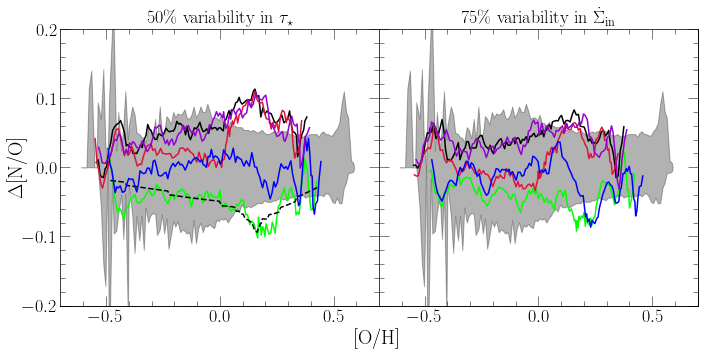

In [6]:
# fig = plt.figure(figsize = (14, 7), facecolor = "white") 
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122, sharey = ax1) 
for ax in [ax1, ax2]: 
    ax.set_xlim([-0.7, 0.7]) 
    ax.set_ylim([-0.2, 0.2]) 
    ax.set_xticks([-0.5, 0.0, 0.5]) 
    ax.set_yticks([-0.2, -0.1, 0.0, 0.1, 0.2]) 
plt.setp(ax2.get_yticklabels(), visible = False) 
dummy = dummy_background_axes([[ax1, ax2]]) 
dummy.set_xlabel("[O/H]", labelpad = 20) 
dummy.set_ylabel(r"$\Delta$[N/O]", labelpad = 30) 
ax1.set_title(r"50\% variability in $\tau_\star$") 
# ax2.set_title(r"25\% variability in $\dot{\Sigma}_\star$")
ax2.set_title(r"75\% variability in $\dot{\Sigma}_\text{in}$")

min_zone = 20
# times = [7.9, 8.7, 9.2, 9.5, 9.9]
[8.5, 9., 9.5, 10., 10.5]
postproc_times = [9.5]
# times = [8.3, 8.8, 9.3, 9.8, 10.3] 
# times = [10.3, 10.8, 11.3, 11.8, 12.3] 
# times = [6.3, 6.8, 7.3, 7.8, 8.3] 
# times = [4.3, 4.8, 5.3, 5.8, 6.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(min_zone, 140)] 
all_zones = ["zone%d" % (_) for _ in range(155)] 

# fiducial = vice.output("../outputs/diffusion/insideout") 
# modsfr = vice.output("../outputs/diffusion/modulated") 
# modsfe = vice.output("../outputs/diffusion/modulated_sfe") 
# fiducial = vice.output("../outputs/diffusion/linear_9e-4")
fiducial = vice.output("../outputs/diffusion/constifr")
fiducial_postproc = vice.output("../outputs/post-process/constifr")
# modsfr = vice.output("../outputs/diffusion/ifroscil")
# modsfe = vice.output("../outputs/diffusion/SFEoscil")
modsfr = vice.output("../outputs/diffusion/ifroscil")
modsfe = vice.output("../outputs/diffusion/SFEoscil")
modsfr_postproc = vice.output("../outputs/post-process/ifroscil")
modsfe_postproc = vice.output("../outputs/post-process/SFEoscil")

for i in range(len(times)): 
    modsfr_delta = len(zones) * [0.]
    modsfe_delta = len(zones) * [0.]
    modsfr_postproc_delta = len(zones) * [0.]
    modsfe_postproc_delta = len(zones) * [0.]
    idx_f = fiducial.zones["zone0"].history["time"].index(times[i])
    for j in range(len(zones)): 
        idx = modsfr.zones["zone0"].history["time"].index(times[i])
        oh = modsfr.zones[zones[j]].history["[o/h]"][idx] 
        diff = [abs(fiducial.zones[zone].history["[o/h]"][idx_f] - oh) for zone in all_zones] 
        zone_idx = diff.index(min(diff))
        modsfr_delta[j] = (modsfr.zones[zones[j]].history["[n/o]"][idx] - 
            fiducial.zones["zone%d" % (zone_idx)].history["[n/o]"][idx_f]) 
        idx = modsfe.zones["zone0"].history["time"].index(times[i])
        oh = modsfe.zones[zones[j]].history["[o/h]"][idx] 
        diff = [abs(fiducial.zones[zone].history["[o/h]"][idx_f] - oh) for zone in all_zones] 
        zone_idx = diff.index(min(diff)) 
        modsfe_delta[j] = (modsfe.zones[zones[j]].history["[n/o]"][idx] - 
            fiducial.zones["zone%d" % (zone_idx)].history["[n/o]"][idx_f]) 
        
        if times[i] in postproc_times:
            idx_fpp = fiducial_postproc.zones["zone0"].history["time"].index(times[i])
#             idx = modsfr_postproc.zones[zones[j]].history["time"].index(times[i])
#             oh = modsfr_postproc.zones[zones[j]].history["[o/h]"][idx]
#             diff = [abs(fiducial_postproc.zones[zone].history["[o/h]"][idx_fpp] - oh) for zone in all_zones]
#             zone_idx = diff.index(min(diff))
#             modsfr_postproc_delta[j] = (modsfr_postproc.zones[zones[j]].history["[n/o]"][idx] -
#                 fiducial_postproc.zones["zone%d" % (zone_idx)].history["[n/o]"][idx_fpp])
            idx = modsfe_postproc.zones[zones[j]].history["time"].index(times[i])
            oh = modsfe_postproc.zones[zones[j]].history["[o/h]"][idx]
            diff = [abs(fiducial_postproc.zones[zone].history["[o/h]"][idx_fpp] - oh) for zone in all_zones]
            zone_idx = diff.index(min(diff))
            modsfe_postproc_delta[j] = (modsfe_postproc.zones[zones[j]].history["[n/o]"][idx] -
                fiducial_postproc.zones["zone%d" % (zone_idx)].history["[n/o]"][idx_fpp])
        else: pass
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]] 
    } 
    idx = modsfe.zones["zone0"].history["time"].index(times[i])
    xvals = [modsfe.zones[zone].history["[o/h]"][idx] for zone in zones] 
    ax1.plot(xvals, modsfe_delta, **kwargs) 
    idx = modsfr.zones["zone0"].history["time"].index(times[i])
    xvals = [modsfr.zones[zone].history["[o/h]"][idx] for zone in zones] 
    ax2.plot(xvals, modsfr_delta, **kwargs) 
    if times[i] in postproc_times:
        kwargs["linestyle"] = '--'
        kwargs["c"] = "black"
        xvals = [modsfe_postproc.zones[zone].history["[o/h]"][idx] for zone in zones]
        ax1.plot(xvals, modsfe_postproc_delta, **kwargs)
#         xvals = [modsfr_postproc.zones[zone].history["[o/h]"][idx] for zone in zones]
#         ax2.plot(xvals, modsfr_postproc_delta, **kwargs)
    else: pass

kwargs = {
    "color": plots.mpltoolkit.named_colors()["black"], 
    "alpha": 0.3, 
    "zorder": -100 
}
xvals = SCHAEFER2020_OH 
lower = len(SCHAEFER2020_OH) * [0.] 
upper = len(SCHAEFER2020_OH) * [0.] 
for i in range(len(lower)): 
    if SCHAEFER2020_NO[i] is not None: 
        if SCHAEFER2020_NO_16TH[i] is not None: lower[i] = SCHAEFER2020_NO_16TH[i] - SCHAEFER2020_NO[i] 
        if SCHAEFER2020_NO_84TH[i] is not None: upper[i] = SCHAEFER2020_NO_84TH[i] - SCHAEFER2020_NO[i] 
ax1.fill_between(xvals, lower, upper, **kwargs) 
ax2.fill_between(xvals, lower, upper, **kwargs) 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0, left = 0.1, bottom = 0.14) 
plt.savefig("../paper/delta_no_schaefercomp.pdf") 
plt.show() 

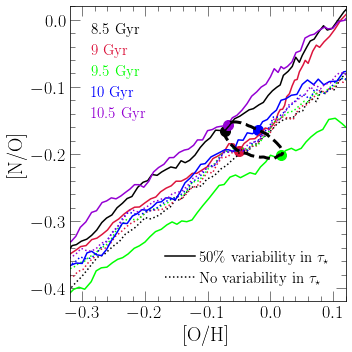

In [3]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
# ax.set_xlim([-0.02, 0.42]) 
ax.set_xlim([-0.32, 0.12])
# ax.set_ylim([-0.16, 0.36]) 
# ax.set_ylim([-0.26, 0.26])
ax.set_ylim([-0.42, 0.02])

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("lower right"), 
    "ncol": 1, 
#     "frameon": False, 
    "fontsize": 15, 
    "bbox_to_anchor": (0.99, 0.01), 
}
line1 = ax.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"50\% variability in $\tau_\star$")[0]
line2 = ax.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"No variability in $\tau_\star$", linestyle = ':')[0] 
leg = ax.legend(**legend_kwargs) 
ax.add_artist(leg) 
line1.remove() 
line2.remove() 

# insideout = vice.output("../outputs/diffusion/insideout") 
# modulated = vice.output("../outputs/diffusion/modulated_sfe") 

# insideout = vice.output("../outputs/diffusion/linear_9e-4")
# modulated = vice.output("../outputs/diffusion/SFEoscil_50")
insideout = vice.output("../outputs/diffusion/constifr")
modulated = vice.output("../outputs/diffusion/SFEoscil")
# modulated = vice.output("../outputs/diffusion/ifroscil_75")
# insideout = vice.output("../outputs/post-process/constifr_lowres")
# modulated = vice.output("../outputs/post-process/SFEoscil_75")
# modulated = vice.output("../outputs/post-process/ifroscil_75")


# times = [6., 6.5, 7., 7.5, 8.] 
# times = [8., 8.5, 9., 9.5, 10.0] 
# times = [8.3, 8.8, 9.3, 9.8, 10.3]
times = [8.5, 9.0, 9.5, 10.0, 10.5]
# times = [7.9, 8.7, 9.2, 9.5, 9.9]

colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    diff = [abs(_ - times[i]) for _ in insideout.zones["zone0"].history["time"]]
    idx = diff.index(min(diff))
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    xvals = [insideout.zones[zone].history["[o/h]"][idx] for zone in zones] 
    yvals = [insideout.zones[zone].history["[n/o]"][idx] for zone in zones] 
    ax.plot(xvals, yvals, linestyle = ':', **kwargs) 
    diff = [abs(_ - times[i]) for _ in modulated.zones["zone0"].history["time"]]
    idx = diff.index(min(diff))
    kwargs["label"] = "%g Gyr" % (times[i]) 
    xvals = [modulated.zones[zone].history["[o/h]"][idx] for zone in zones] 
    yvals = [modulated.zones[zone].history["[n/o]"][idx] for zone in zones] 
    ax.plot(xvals, yvals, **kwargs) 
legend_kwargs["handlelength"] = 0 
legend_kwargs["loc"] = plots.mpltoolkit.mpl_loc("upper left") 
legend_kwargs["bbox_to_anchor"] = (0.01, 0.99) 
leg = ax.legend(**legend_kwargs) 
for i in range(len(colors)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
    
zone = "zone80"
indeces = [modulated.zones[zone].history["time"].index(_) for _ in times] 
no = modulated.zones[zone].history["[n/o]"][indeces[0]:indeces[-1] + 1] 
oh = modulated.zones[zone].history["[o/h]"][indeces[0]:indeces[-1] + 1] 
for i in range(len(times)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 100 
    } 
    ax.scatter(oh[indeces[i] - indeces[0]], no[indeces[i] - indeces[0]], **kwargs) 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "linewidth": 3,
    "linestyle": '--' 
} 
ax.plot(oh, no, **kwargs) 

plt.tight_layout() 
plt.savefig("../paper/no_oh_sfevar.pdf") 
plt.show() 

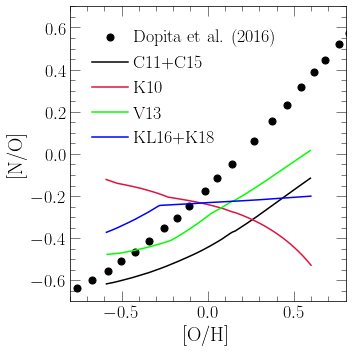

In [18]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
# names = [
#     "../outputs/post-process/insideout_1xcristallo", 
#     "../outputs/post-process/insideout_karakas10", 
#     "../outputs/post-process/insideout_1xventura13", 
#     "../outputs/post-process/insideout_karakas16", 
# ]
names = [
    "../outputs/post-process/c11c15",
    "../outputs/post-process/k10",
    "../outputs/post-process/v13",
    "../outputs/post-process/kl16k18"
]
outputs = [vice.output(_) for _ in names] 
colors = ["black", "crimson", "lime", "blue"] 
zones = ["zone%d" % (_) for _ in range(20, 151)] 
labels = [
    "C11+C15", 
    "K10", 
    "V13",
    "KL16+K18" 
] 

dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs)

for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs)


handles, labels = ax.get_legend_handles_labels()
handles.insert(0, handles[-1])
labels.insert(0, labels[-1])
handles = handles[:-1]
labels = labels[:-1]
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "bbox_to_anchor": (0.02, 0.98)
}
leg = ax.legend(handles, labels, **kwargs) 

plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions_unmodified.pdf") 
plt.show() 

[6.0, 4.0]


/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0rc1-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


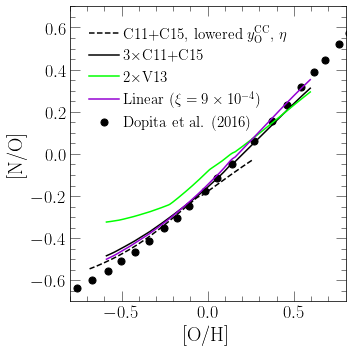

In [16]:
print(mpl.rcParams["figure.figsize"])
# mpl.rcParams["figure.figsize"] = [5.0, 5.0]
# print(mpl.rcParams["figure.figsize"])

# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
# names = [
#     "../outputs/diffusion/insideout", 
#     "../outputs/diffusion/insideout_karakas10", 
#     "../outputs/diffusion/insideout_karakas16", 
#     "../outputs/diffusion/insideout_ventura13", 
#     "../outputs/diffusion/insideout_linear" 
# ]
# names = [
#     "../outputs/post-process/lowered_yields_eta",
#     "../outputs/post-process/insideout", 
#     "../outputs/post-process/insideout_karakas10", 
#     "../outputs/post-process/insideout_karakas16", 
#     "../outputs/post-process/insideout_ventura13", 
#     "../outputs/post-process/insideout_linear"
# ]
names = [
    "../outputs/post-process/c11c15_lowered_yields_eta",
    "../outputs/post-process/c11c15x3",
    "../outputs/post-process/v13x2",
    "../outputs/post-process/linear_9e-4"
]
outputs = [vice.output(_) for _ in names] 
# colors = ["black", "crimson", "blue", "lime", "darkviolet"] 
colors = ["black", "black", "lime", "darkviolet"]
linestyles = ["--", "-", "-", "-"]
zones = ["zone%d" % (_) for _ in range(20, 151)] 
labels = [
    r"C11+C15, lowered $y_\text{O}^\text{CC}$, $\eta$",
    r"3$\times$C11+C15", 
#     "K10", 
#     "K16+K18", 
    r"2$\times$V13", 
    r"Linear ($\xi = 9\times10^{-4}$)"
]
for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i],
        "linestyle": linestyles[i]
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
#     "frameon": False, 
    "fontsize": 15, 
    "bbox_to_anchor": (0.02, 0.98), 
#     "handlelength": 0 
}
leg = ax.legend(**kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions.pdf") 
plt.show() 

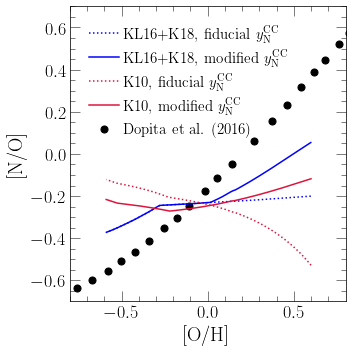

In [19]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
# ax = fig.add_subplot(111, facecolor = "white") 
ax = fig.add_subplot(111)
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
# names = [
#     "../outputs/diffusion/insideout_karakas10", 
#     "../outputs/diffusion/insideout_karakas10_linearcc", 
#     "../outputs/diffusion/insideout_karakas16", 
#     "../outputs/diffusion/insideout_karakas16_brokencc" 
# ]
# names = [
#     "../outputs/post-process/insideout_karakas16", 
#     "../outputs/post-process/insideout_karakas16_brokencc",
#     "../outputs/post-process/insideout_karakas10", 
#     "../outputs/post-process/insideout_karakas10_linearcc", 
# ]
names = [
    "../outputs/post-process/kl16k18",
    "../outputs/post-process/kl16k18_modyncc",
    "../outputs/post-process/k10",
    "../outputs/post-process/k10_modyncc"
]
outputs = [vice.output(_) for _ in names] 
colors = ["blue", "blue", "crimson", "crimson"] 
linestyles = [':', '-', ':', '-'] 
zones = ["zone%d" % (_) for _ in range(20, 151)] 
labels = [
    r"KL16+K18, fiducial $y_\text{N}^\text{CC}$", 
    r"KL16+K18, modified $y_\text{N}^\text{CC}$",
    r"K10, fiducial $y_\text{N}^\text{CC}$", 
    r"K10, modified $y_\text{N}^\text{CC}$"
]
for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i], 
        "linestyle": linestyles[i] 
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 15, 
    "bbox_to_anchor": (0.02, 0.98), 
}
leg = ax.legend(**kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions_karakas.pdf") 
plt.show() 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0rc1-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: ccsne n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


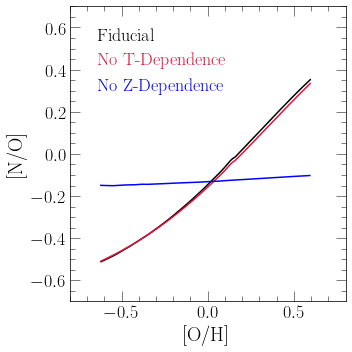

In [16]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white")
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("[O/H]")
ax.set_ylabel("[N/O]")
ax.set_xlim([-0.8, 0.8])
ax.set_ylim([-0.7, 0.7])

# outputs = [
#     "../outputs/post-process/insideout_linear",
#     "../outputs/post-process/prompt_agb",
#     "../outputs/post-process/z_indep_agb"
# ]
outputs = [
    "../outputs/post-process/linear_9e-4",
    "../outputs/post-process/linear_notdep",
    "../outputs/post-process/linear_nozdep"
]
outputs = [vice.output(_) for _ in outputs]
colors = ["black", "crimson", "blue"]
labels = ["Fiducial", "No T-Dependence", "No Z-Dependence"]
zones = ["zone%d" % (_) for _ in range(20, 155)]

for i in range(len(outputs)):
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones]
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones]
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]],
        "label": labels[i]
    }
    ax.plot(xvals, yvals, **kwargs)

leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, handlelength = 0,
    bbox_to_anchor = (0.02, 0.98))
# for i in range(len(outputs)):
#     leg.get_texts()[i].set_color(colors[i])
#     leg.legendHandles[i].set_visible(False)
plots.mpltoolkit.fancy_legend(leg, colors)

plt.tight_layout()
plt.savefig("../paper/t_z_dep_comp.pdf")
plt.show()

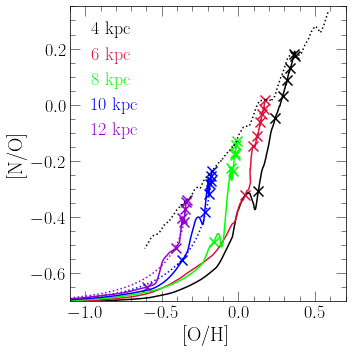

In [9]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.1, 0.7]) 
ax.set_ylim([-0.7, 0.35]) 
zones = ["zone40", "zone60", "zone80", "zone100", "zone120"] 
labels = [] 
for i in [4, 6, 8, 10, 12]: 
#     labels.append(r"$R_\text{gal}$ = %d kpc" % (i))
    labels.append(r"%d kpc" % (i)) 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
times = [2, 4, 6, 8, 10, 12, 13.2] 

# out = vice.output("../outputs/diffusion/insideout") 
# post = vice.output("../outputs/post-process/insideout")
out = vice.output("../outputs/diffusion/linear_9e-4")
post = vice.output("../outputs/post-process/linear_9e-4")

post_zones = ["zone100", "zone120"] 

for i in range(len(zones)): 
    xvals = out.zones[zones[i]].history["[o/h]"] 
    yvals = out.zones[zones[i]].history["[n/o]"] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    ax.plot(xvals, yvals, **kwargs) 
    for j in range(len(times)): 
        idx = out.zones["zone0"].history["time"].index(times[j]) 
        oh = out.zones[zones[i]].history["[o/h]"][idx] 
        no = out.zones[zones[i]].history["[n/o]"][idx] 
        ax.scatter(oh, no, marker = plots.mpltoolkit.markers()["x"], 
            color = plots.mpltoolkit.named_colors()[colors[i]], s = 100) 
    if zones[i] in post_zones: 
        xvals = post.zones[zones[i]].history["[o/h]"] 
        yvals = post.zones[zones[i]].history["[n/o]"] 
        kwargs["linestyle"] = ':' 
        if "label" in kwargs.keys(): del kwargs["label"] 
        ax.plot(xvals, yvals, **kwargs) 
    else: pass 

leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, 
    frameon = False, handlelength = 0) 
# for i in range(len(zones)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plots.mpltoolkit.fancy_legend(leg, colors)
    
zones = ["zone%d" % (_) for _ in range(20, 154)] 
xvals = [out.zones[zone].history["[o/h]"][-1] for zone in zones] 
yvals = [out.zones[zone].history["[n/o]"][-1] for zone in zones] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 

plt.tight_layout() 
plt.savefig("../paper/no_oh_superposition.pdf") 
plt.show() 

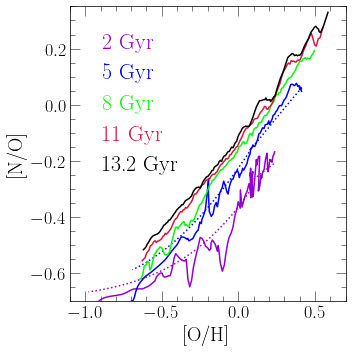

In [10]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
# ax = fig.add_subplot(111, facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.1, 0.7]) 
ax.set_ylim([-0.7, 0.35])
times = [2, 5, 8, 11, 13.2] 
colors = ["darkviolet", "blue", "lime", "crimson", "black"] 
# linestyles = ['-.', ':', '-', '--', '-'] 
# diffusion = vice.output("../outputs/diffusion/insideout") 
# postprocess = vice.output("../outputs/post-process/insideout") 
diffusion = vice.output("../outputs/diffusion/linear_9e-4")
postprocess = vice.output("../outputs/post-process/linear_9e-4")
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    idx = postprocess.zones["zone0"].history["time"].index(times[i]) 
    oh = [postprocess.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [postprocess.zones[zone].history["[n/o]"][idx] for zone in zones] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]] 
    } 
    if i < 2: ax.plot(oh, no, linestyle = ':', zorder = 5, **kwargs) 
    idx = diffusion.zones["zone0"].history["time"].index(times[i]) 
    oh = [diffusion.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [diffusion.zones[zone].history["[n/o]"][idx] for zone in zones] 
#     kwargs = {
#         "c": plots.mpltoolkit.named_colors()[colors[i]], 
#         "linestyle": linestyles[i], 
#         "label": "T = %g Gyr" % (times[i]) 
#     } 
#     kwargs["label"] = "T = %g Gyr" % (times[i]) 
    kwargs["label"] = "%g Gyr" % (times[i])
    ax.plot(oh, no, zorder = 10, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.02, 0.98), 
    "fontsize": 22, 
    "handlelength": 0 
} 
leg = ax.legend(**kwargs) 
# for i in range(len(times)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plots.mpltoolkit.fancy_legend(leg, colors)
plt.tight_layout() 
plt.savefig("../paper/no_oh_timeevol.pdf") 
plt.show() 

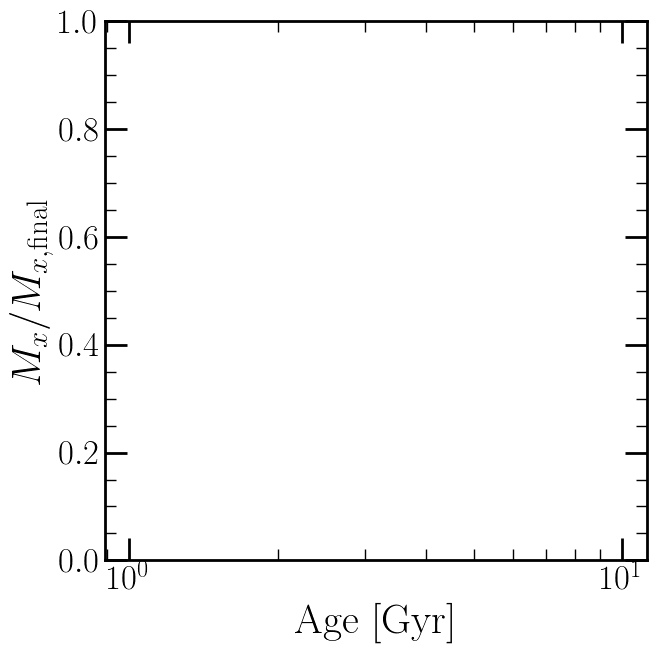

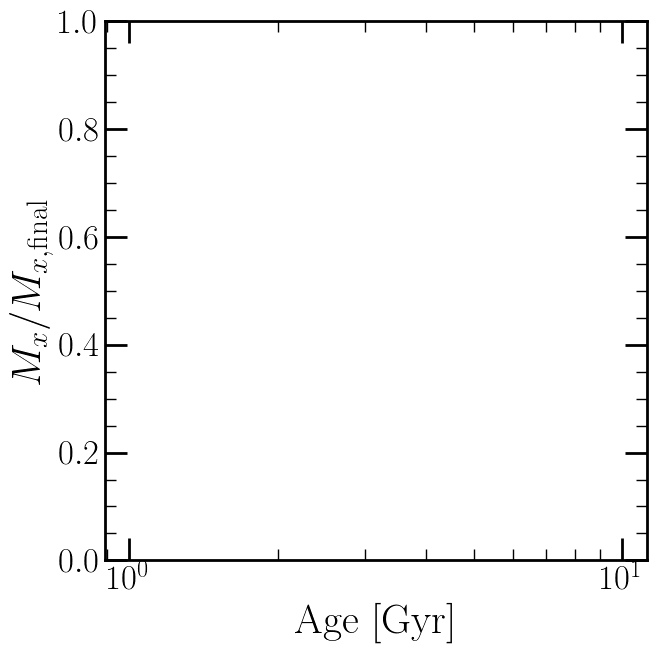

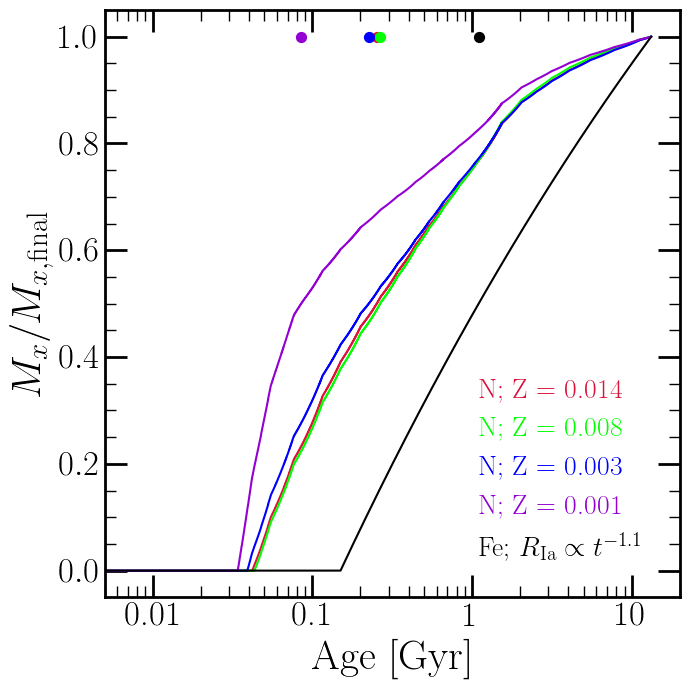

In [24]:
vice.mlr.setting = "ka1997" # mass-lifetime relation 
total_time = 13.2 # Gyr, total time to run SSP calculation for
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xscale("log") 
ax.set_xlabel("Age [Gyr]") 
ax.set_ylabel(r"$M_x/M_{x,\text{final}}$") 
# plots.mpltoolkit.xticklabel_formatter(ax) 
ax.xaxis.set_major_formatter(fsf("%g")) 
ax.set_xlim([0.005, 20]) 
ax.set_ylim([-0.05, 1.05]) 
vice.yields.ccsne.settings['fe'] = 0.0 
vice.yields.sneia.settings['fe'] = 0.0017 
vice.yields.ccsne.settings['n'] = 0 
vice.yields.agb.settings['n'] = "cristallo11"
metallicities = [0.014, 0.008, 0.003, 0.001] 
colors = ["crimson", "lime", "blue", "darkviolet"] 
for i in range(len(metallicities)): 
    mass, time = vice.single_stellar_population('n', Z = metallicities[i], 
        time = total_time, dt = 1.e-4) 
    mass = [_ / mass[-1] for _ in mass] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": "N; Z = %g" % (metallicities[i]) 
    } 
    ax.plot(time, mass, **kwargs) 
    diff = [abs(_ - 0.5) for _ in mass] 
    idx = diff.index(min(diff)) 
    ax.scatter(time[idx], 1.0, c = plots.mpltoolkit.named_colors()[colors[i]], 
        marker = plots.mpltoolkit.markers()["circle"], s = 50) 
#     ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()[colors[i]], 
#         linestyle = ':') 
mass, time = vice.single_stellar_population('fe', time = total_time, dt = 1.e-4) 
mass = [_ / mass[-1] for _ in mass] 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "label": r"Fe; $R_\text{Ia} \propto t^{-1.1}$" 
} 
ax.plot(time, mass, **kwargs) 
diff = [abs(_ - 0.5) for _ in mass] 
idx = diff.index(min(diff)) 
ax.scatter([time[idx]], 1.0, c = plots.mpltoolkit.named_colors()["black"], 
    marker = plots.mpltoolkit.markers()["circle"], s = 50)
# ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()["black"], 
#     linestyle = ':') 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 20, handlelength = 0, bbox_to_anchor = (0.98, 0.02)) 
for i in range(len(metallicities)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
leg.legendHandles[i + 1].set_visible(False) 

plt.tight_layout() 
plt.savefig("../paper/ssp_production.pdf") 
plt.show() 

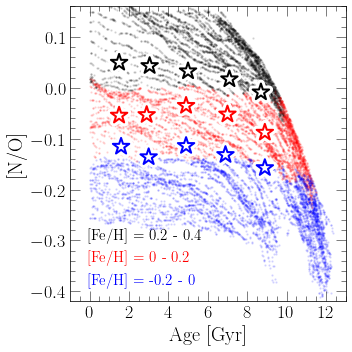

In [11]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlim([-1, 13]) 
ax.set_xticks(range(0, 14, 2)) 
ax.set_xlabel("Age [Gyr]") 
ax.set_ylabel("[N/O]") 
ax.set_ylim([-0.42, 0.16]) 


# out = vice.output("../outputs/diffusion/insideout") 
out = vice.output("../outputs/diffusion/linear_9e-4")
feh_bins = [[0.2, 0.4], [0.0, 0.2], [-0.2, 0.0]] 
age_bins = [[0, 2], [2, 4], [4, 6], [6, 8], [8, 10]] 
colors = ["black", "red", "blue"] 
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 


for i in range(len(feh_bins)): 
    sub = stars.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    feh = [sub["[fe/h]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[Fe/H] = %g - %g" % (feh_bins[i][0], feh_bins[i][1]), 
        "alpha": 0.1 
    } 
    ax.scatter(ages, no, **kwargs) 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 15) 
# for i in range(len(feh_bins)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plots.mpltoolkit.fancy_legend(leg, colors)
    

v21 = src.data.read("vincenzo2021") 
outline = pe.withStroke(linewidth = 8, foreground = "white") 
for i in range(len(feh_bins)): 
    sub_ = v21.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    for j in range(len(age_bins)): 
        sub = sub_.filter("age", ">=", age_bins[j][0]).filter("age", "<=", age_bins[j][1]) 
        age = np.median(sub["age"]) 
        no = np.median(sub["[n/o]"]) 
#         age_errbar = [[age - age_bins[j][0]], [age_bins[j][1] - age]] 
#         no_errbar = np.std(sub["[n/o]"]) 
#         kwargs = {
#             "color": plots.mpltoolkit.named_colors()[colors[i]], 
#             "marker": plots.mpltoolkit.markers()["star"], 
#             "markerfacecolor": plots.mpltoolkit.named_colors()["white"], 
#             "markeredgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
#             "markersize": 20 
#         }
#         ax1.errorbar(age, no, xerr = age_errbar, yerr = no_errbar, **kwargs)
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 300, 
            "linewidths": 2.0, 
            "path_effects": [outline] 
        } 
        ax.scatter(age, no, **kwargs) 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 
plt.savefig("../paper/no_vs_age.pdf") 
plt.show() 

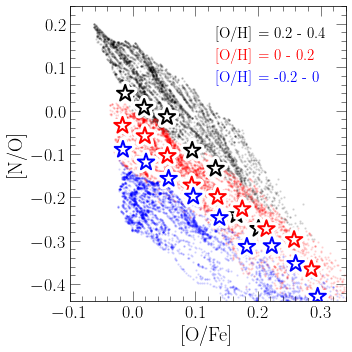

In [14]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/Fe]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.1, 0.34]) 
ax.set_ylim([-0.44, 0.24]) 
oh_bins = [[0.2, 0.4], [0.0, 0.2], [-0.2, 0.0]] 
ofe_bins = [[0.04 * (i - 1), 0.04 * i] for i in range(11)] 
colors = ["black", "red", "blue"] 
# out = vice.output("../outputs/diffusion/insideout") \
out = vice.output("../outputs/diffusion/linear_9e-4")
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 

v21 = src.data.read("vincenzo2021") 
v21["[o/fe]"] = [a - b for a, b in zip(v21["[o/h]"], v21["[fe/h]"])] 
outline = pe.withStroke(linewidth = 8, foreground = "white") 

for i in range(len(oh_bins)): 
    sub = stars.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    ofe = [sub["[o/fe]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[O/H] = %g - %g" % (oh_bins[i][0], oh_bins[i][1]), 
        "alpha": 0.1 
    } 
    ax.scatter(ofe, no, **kwargs) 
    sub_ = v21.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    for j in range(len(ofe_bins)): 
        sub = sub_.filter("[o/fe]", ">=", ofe_bins[j][0]).filter("[o/fe]", "<=", ofe_bins[j][1]) 
        ofe = np.median(sub["[o/fe]"]) 
        no = np.median(sub["[n/o]"]) 
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 300, 
            "zorder": 100, 
            "linewidths": 2.0, 
            "path_effects": [outline] 
        } 
        ax.scatter(ofe, no, **kwargs) 
    
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 15, bbox_to_anchor = (0.98, 0.98)) 
# for i in range(len(oh_bins)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False)
plots.mpltoolkit.fancy_legend(leg, colors)
plt.tight_layout() 
plt.savefig("../paper/no_vs_ofe.pdf") 
plt.show() 

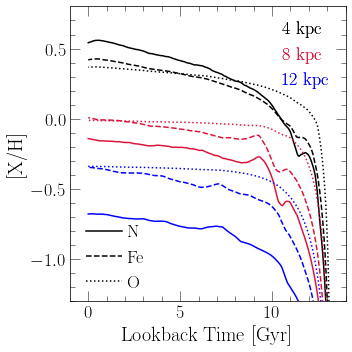

In [15]:
# fig = plt.figure(figsize = (7, 7), facecolor = "white") 
# ax = fig.add_subplot(111, facecolor = "white") 
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("Lookback Time [Gyr]") 
ax.set_ylabel("[X/H]") 
# ax.set_ylabel("d[X/Y]/dt") 
ax.set_xlim([-1, 14]) 
ax.set_ylim([-1.3, 0.8]) 
# ax.set_yticks([-1.4 + 0.2 * _ for _ in range(12)]) 
# ax.set_ylim([-0.2, 0.4]) 

# out = vice.output("../outputs/diffusion/insideout") 
out = vice.output("../outputs/diffusion/linear_9e-4")

kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"] 
}
line1 = ax.plot([0, 1], [0, 1], linestyle = '-', label = "N", **kwargs)[0] 
line2 = ax.plot([0, 1], [0, 1], linestyle = '--', label = "Fe", **kwargs)[0] 
line3 = ax.plot([0, 1], [0, 1], linestyle = ':', label = "O", **kwargs)[0] 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, bbox_to_anchor = (0.0, -0.02)) 
ax.add_artist(leg) 
line1.remove() 
line2.remove() 
line3.remove() 

# zones = ["zone40", "zone60", "zone80", "zone100", "zone120"] 
# labels = ["4 kpc", "6 kpc", "8 kpc", "10 kpc", "12 kpc"] 
# colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone40", "zone80", "zone120"] 
labels = ["4 kpc", "8 kpc", "12 kpc"] 
colors = ["black", "crimson", "blue"] 
for i in range(len(zones)): 
    xvals = out.zones[zones[i]].history["lookback"] 
#     xvals = [(a + b) / 2 for a, b in zip(out.zones[zones[i]].history["lookback"][1:], 
#         out.zones[zones[i]].history["lookback"][:-1])] 
    yvals = out.zones[zones[i]].history["[fe/h]"] 
#     yvals = len(xvals) * [0.] 
#     for j in range(len(yvals)): 
#         yvals[j] = out.zones[zones[i]].history["[fe/h]"][j + 1] - out.zones[zones[i]].history["[fe/h]"][j] 
#         yvals[j] /= out.zones[zones[i]].history["time"][j + 1] - out.zones[zones[i]].history["time"][j] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "linestyle": '--' 
    } 
    ax.plot(xvals, yvals, **kwargs) 
#     for j in range(len(yvals)): 
#         yvals[j] = out.zones[zones[i]].history["[n/h]"][j + 1] - out.zones[zones[i]].history["[n/h]"][j] 
#         yvals[j] /= out.zones[zones[i]].history["time"][j + 1] - out.zones[zones[i]].history["time"][j] 
    yvals = out.zones[zones[i]].history["[o/h]"] 
    kwargs["linestyle"] = ':' 
    ax.plot(xvals, yvals, **kwargs) 
    yvals = out.zones[zones[i]].history["[n/h]"] 
    kwargs["linestyle"] = '-' 
    kwargs["label"] = labels[i] 
    ax.plot(xvals, yvals, **kwargs) 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0) 
# for i in range(len(zones)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plots.mpltoolkit.fancy_legend(leg, colors)
ax.add_artist(leg) 
plt.tight_layout() 
plt.savefig("../paper/nh_feh_vs_lookback.pdf") 
plt.show() 

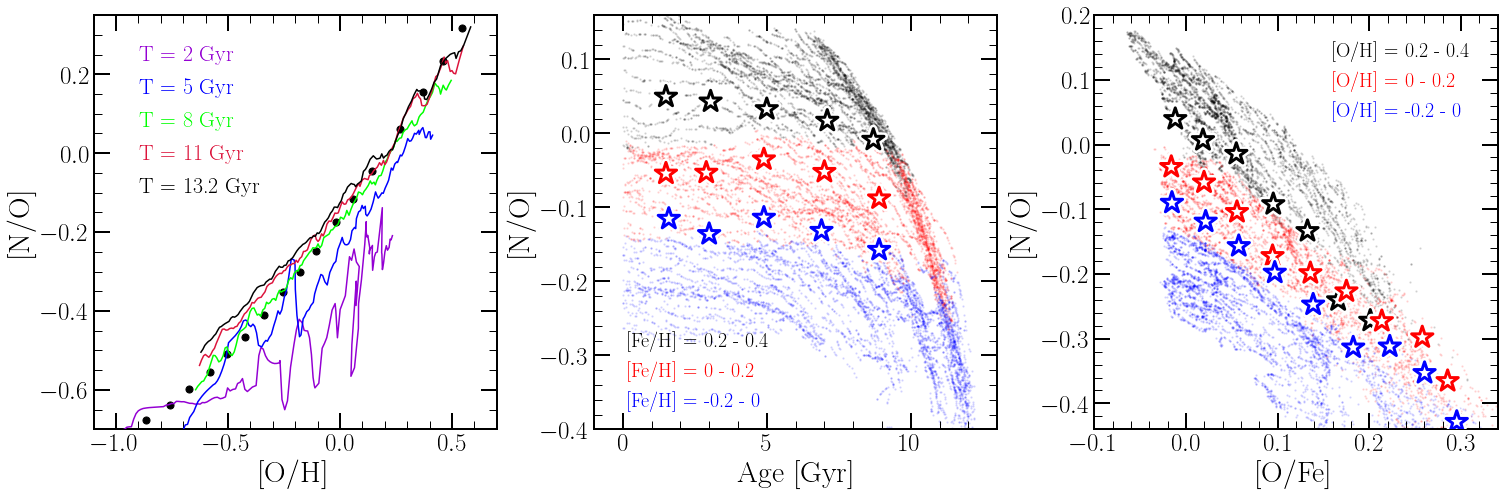

In [12]:
fig = plt.figure(figsize = (21, 7), facecolor = "white")
axes = []
xlabels = ["[O/H]", "Age [Gyr]", "[O/Fe]"]
xlim = [[-1.1, 0.7], [-1, 13], [-0.1, 0.34]]
ylim = [[-0.7, 0.35], [-0.4, 0.16], [-0.44, 0.2]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel("[N/O]")
    axes[i].set_xlim(xlim[i])
    axes[i].set_ylim(ylim[i])
    
times = [2, 5, 8, 11, 13.2] 
colors = ["darkviolet", "blue", "lime", "crimson", "black"] 
diffusion = vice.output("../outputs/diffusion/insideout")  
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]],
        "label": "T = %g Gyr" % (times[i])
    } 
    idx = diffusion.zones["zone0"].history["time"].index(times[i]) 
    oh = [diffusion.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [diffusion.zones[zone].history["[n/o]"][idx] for zone in zones] 
    axes[0].plot(oh, no, zorder = 10, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.02, 0.98), 
    "fontsize": 22, 
    "handlelength": 0 
} 
leg = axes[0].legend(**kwargs) 
for i in range(len(times)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 

dopita2016 = src.data.read("dopita2016")
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"],
    "marker": plots.mpltoolkit.markers()["circle"],
#     "label": "Dopita et al. (2016)",
    "s": 50
}
axes[0].scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs)  

out = vice.output("../outputs/diffusion/insideout") 
feh_bins = [[0.2, 0.4], [0.0, 0.2], [-0.2, 0.0]] 
age_bins = [[0, 2], [2, 4], [4, 6], [6, 8], [8, 10]] 
colors = ["black", "red", "blue"] 
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 

for i in range(len(feh_bins)): 
    sub = stars.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    feh = [sub["[fe/h]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[Fe/H] = %g - %g" % (feh_bins[i][0], feh_bins[i][1]), 
        "alpha": 0.1 
    } 
    axes[1].scatter(ages, no, **kwargs) 
leg = axes[1].legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(len(feh_bins)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
    
v21 = src.data.read("vincenzo2021") 
outline = pe.withStroke(linewidth = 8, foreground = "white") 
for i in range(len(feh_bins)): 
    sub_ = v21.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    for j in range(len(age_bins)): 
        sub = sub_.filter("age", ">=", age_bins[j][0]).filter("age", "<=", age_bins[j][1]) 
        age = np.median(sub["age"]) 
        no = np.median(sub["[n/o]"]) 
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 500, 
            "linewidths": 3.0, 
            "path_effects": [outline] 
        } 
        axes[1].scatter(age, no, **kwargs) 
        
oh_bins = [[0.2, 0.4], [0.0, 0.2], [-0.2, 0.0]] 
ofe_bins = [[0.04 * (i - 1), 0.04 * i] for i in range(11)] 
colors = ["black", "red", "blue"] 
out = vice.output("../outputs/diffusion/insideout") 
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 

# v21 = src.data.read("vincenzo2021") 
v21["[o/fe]"] = [a - b for a, b in zip(v21["[o/h]"], v21["[fe/h]"])] 
outline = pe.withStroke(linewidth = 8, foreground = "white") 

for i in range(len(oh_bins)): 
    sub = stars.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    ofe = [sub["[o/fe]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[O/H] = %g - %g" % (oh_bins[i][0], oh_bins[i][1]), 
        "alpha": 0.1 
    } 
    axes[2].scatter(ofe, no, **kwargs) 
    sub_ = v21.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    for j in range(len(ofe_bins)): 
        sub = sub_.filter("[o/fe]", ">=", ofe_bins[j][0]).filter("[o/fe]", "<=", ofe_bins[j][1]) 
        ofe = np.median(sub["[o/fe]"]) 
        no = np.median(sub["[n/o]"]) 
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 500, 
            "zorder": 100, 
            "linewidths": 3.0, 
            "path_effects": [outline] 
        } 
        axes[2].scatter(ofe, no, **kwargs) 
    
leg = axes[2].legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20, bbox_to_anchor = (0.98, 0.98)) 
for i in range(len(oh_bins)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout()
# plt.show()
plt.savefig("N_abundance_evolution.pdf")